In [225]:
from bs4 import BeautifulSoup
from urllib.request import Request, urlopen
import json
import pickle
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
headers = {'User-Agent': "Mozilla/5.0 (Linux; SM-G955U Build/R16NW) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/116.0.0.0"}

In [265]:
model_id-filter-dropdown

NameError: name 'model_id' is not defined

In [266]:
html_file = open("page_2.html", "r", encoding="utf-8")
html_value = html_file.read()
soup = BeautifulSoup(html_value, "html.parser")
models_soup = soup.find('ul', {'data-testid' : 'model_id-filter-dropdown'})

In [271]:
m = models_soup.find_all('li')

In [272]:
len(m)

73

In [273]:
m

[<li>Model</li>,
 <li>1300</li>,
 <li>145</li>,
 <li>Accord</li>,
 <li>Acty Truck</li>,
 <li>Acty Van</li>,
 <li>Airwave</li>,
 <li>Ascot</li>,
 <li>Avancier</li>,
 <li>Ballade</li>,
 <li>Beat</li>,
 <li>BR-V</li>,
 <li>Capa</li>,
 <li>City</li>,
 <li>Civic</li>,
 <li>Civic Type R</li>,
 <li>Concerto</li>,
 <li>CR-V</li>,
 <li>CR-X</li>,
 <li>CR-Z</li>,
 <li>Crossroad</li>,
 <li>Domani</li>,
 <li>E</li>,
 <li>Edix</li>,
 <li>Element</li>,
 <li>Elysion</li>,
 <li>Fit</li>,
 <li>Freed</li>,
 <li>Horizon</li>,
 <li>HR-V</li>,
 <li>Hybrid</li>,
 <li>Insight</li>,
 <li>Inspire</li>,
 <li>Integra</li>,
 <li>Integra Type R</li>,
 <li>Jade</li>,
 <li>Jazz</li>,
 <li>Jazz Hybrid</li>,
 <li>Lagreat</li>,
 <li>Legend</li>,
 <li>Life</li>,
 <li>Logo</li>,
 <li>MDX</li>,
 <li>Mobilio</li>,
 <li>N BOX</li>,
 <li>N-One</li>,
 <li>N360</li>,
 <li>N-Van</li>,
 <li>NSX</li>,
 <li>Odyssey</li>,
 <li>Orthia</li>,
 <li>Pertner</li>,
 <li>Prelude</li>,
 <li>Quint</li>,
 <li>Rafaga</li>,
 <li>S-MX</li>,
 <li

In [ ]:
i = 4
while i > 0:
    url = f"https://www.mudah.my/malaysia/cars-for-sale/honda?o={i}"
    req = Request(url, headers=headers)
    res = urlopen(req).read()
    soup = BeautifulSoup(res, "html.parser")
    regex = re.compile('listing-ad-item.*')
    car_list = soup.find_all('div', {'data-testid' : regex})
    
    if len(car_list) > 0:
        f = open(f"page_{i}.html", "w", encoding="utf-8")
        f.write(str(soup))
        f.close()
        print(f"page {i} is saved; count: {len(car_list)}")
    else:
        break
    i += 1

In [203]:
data = []
num_pages = 32
car_regex = re.compile('listing-ad-item.*')

for page in range(1, num_pages):
    html_file = open(f"page_{page}.html", "r", encoding="utf-8")
    html_value = html_file.read()
    soup = BeautifulSoup(html_value, "html.parser")
    
    car_soup_1 = soup.find_all('div', {'data-testid' : car_regex})
    car_soup_2 = soup.find('script', {'type' : 'application/ld+json'})
    cars_json = json.loads(car_soup_2.text)
    car_list = cars_json[2]['itemListElement']

    assert len(car_soup_1) == cars_json[2]['numberOfItems']

    for i in range(len(car_soup_1)):
        url = get_url(car_soup_1[i])

        assert url == car_list[i]['item']['url']
        
        year = get_year(car_soup_1[i])
        mileage = get_mileage(car_soup_1[i])
        price = car_list[i]['item']['offers']['price']
        name = get_name(car_soup_1[i])
        loc = get_location(car_soup_1[i])
        url = get_url(car_soup_1[i])

        row = {
            "year": year,
            "name": name,
            "price": price,
            "mileage": mileage,
            "location": loc,
            "page": page,
            "url": url,
        }
        data.append(row)

    

In [253]:
df = pd.DataFrame(data)
convert_dict = {'year': int, 'price': float}
df = df.astype(convert_dict)

In [254]:
df

,year,name,price,mileage,location,page,url
0,2023,2023 Honda CIVIC 2.0 TYPE R MY23 FL5 (M),298000.0,10000 - 14999,Kuala Lumpur,1,https://www.mudah.my/2023-honda-civic-2-0-type...
1,2014,2014 Honda CITY 1.5 E FACELIFT (A) FULL ACCESSORY,33900.0,90000 - 94999,Penang,1,https://www.mudah.my/2014-honda-city-1-5-e-fac...
2,2019,2019 Honda CITY 1.5 (A) PRICE CORET UNTUNG 1K JA,49900.0,60000 - 64999,Penang,1,https://www.mudah.my/2019-honda-city-1-5-a-pri...
3,2015,2015 Honda HR-V 1.8 V (A) KEYLESS PUSHSTART F/...,41800.0,130000 - 139999,Kuala Lumpur,1,https://www.mudah.my/2015-honda-hr-v-1-8-v-a-k...
4,2018,2018 Honda CITY 1.5 HYB (A) 3YRS WARRANTY H/LOAN,45999.0,55000 - 59999,Johor,1,https://www.mudah.my/2018-honda-city-1-5-hyb-a...
...,...,...,...,...,...,...,...
1235,2015,2015 Honda CITY 1.5 S (A) 2Y WARRANTY 1 LADY O...,29888.0,90000 - 94999,Selangor,31,https://www.mudah.my/2015-honda-city-1-5-s-a-2...
1236,2022,2022 Honda CITY 1.5 V (A) WARRANTY FULL SERVICE,66888.0,40000 - 44999,Selangor,31,https://www.mudah.my/2022-honda-city-1-5-v-a-w...
1237,2024,"2024 CITY S,E,V, RS PETROL ,RS eHEV HIGH REBATE",77900.0,0 - 4999,Selangor,31,https://www.mudah.my/2024-city-s-e-v-rs-petrol...
1238,2024,"2024 City 1.5 HATCHBACK S,E,V,RS, EHEV ready s...",82900.0,0 - 4999,Kuala Lumpur,31,https://www.mudah.my/2024-city-1-5-hatchback-s...


In [27]:
def get_year(car_soup):
    try:
        content = car_soup.find('div', {'title' : 'Manufactured Year'})
        year = content.find("div").text
        return year
    except:
        try:
            content = car_soup.find('div', {'data-testid' : 'year-verified-badge'})
            year = content.find("div").text
            return year
        except:
            pass
    return None

In [60]:
def get_mileage(car_soup):
    try:
        mileage = car_soup.find('div', {'title' : 'Mileage'})
        m = mileage.find("div").text
        return m
    except:
        return None

In [202]:
def get_name(car_soup):
    name = car_soup.find('a')
    if name:
        return name['title']
    return None

In [143]:
def get_url(car_soup):
    name = car_soup.find('a')
    if name:
        return name['href']
    return None

In [100]:
def get_location(car_soup):
    c = car_soup.find('span', {'title' : 'Region'})
    if c:
        r = c.find("span")
        return r.text
    return None

In [263]:
model_name = "city"

def get_model(row):
    if model_name in row['name'].lower():
        return model_name
    return None

df['model'] = df.apply(get_model, axis=1)
fil_df = df[(df['model'] == model_name)]

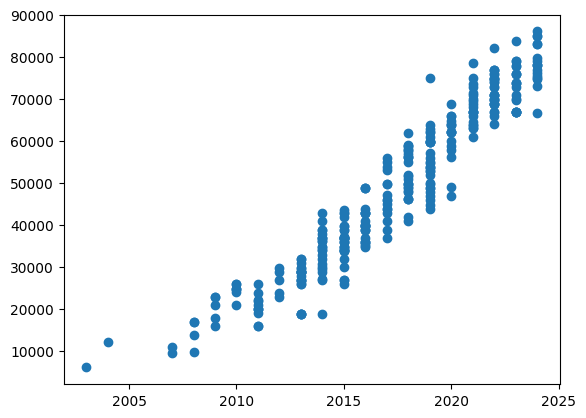

In [264]:
plt.scatter(fil_df['year'].to_numpy(), fil_df['price'].to_numpy())
plt.show()

In [277]:
from scipy.stats import pearsonr, spearmanr

In [276]:
pearsonr(fil_df['year'].to_numpy(), fil_df['price'].to_numpy())

PearsonRResult(statistic=np.float64(0.9552967062481638), pvalue=np.float64(3.600692736434579e-167))

In [278]:
spearmanr(fil_df['year'].to_numpy(), fil_df['price'].to_numpy())

SignificanceResult(statistic=np.float64(0.9645924163599529), pvalue=np.float64(1.2011384034628273e-182))